# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [40]:
#data_dir = './data/'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

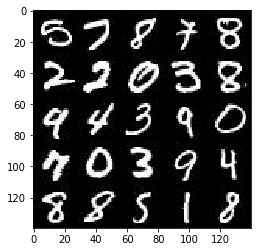

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

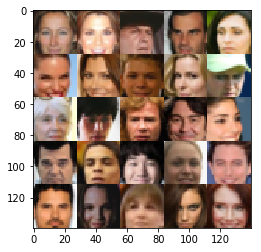

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input = tf.placeholder(tf.float32,shape=[None,
                                                 image_width,
                                                 image_height,
                                                 image_channels],
                                name = 'input_real')
    z_input = tf.placeholder(tf.float32,shape=[None,
                                             z_dim], 
                             name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, name="learn_rate")
    
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [20]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha=0.2
    stddev=0.02
    
    with tf.variable_scope('discriminator', reuse=reuse):
    
        # Input
        
        layer_1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
 
        # Layer 2
        layer_2 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_2 = tf.layers.batch_normalization(layer_2, training=True)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        
        # Layer 3
        layer_3 = tf.layers.conv2d(images, 256, 5, strides=2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_3 = tf.layers.batch_normalization(layer_3, training=True)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)

        # Flatten
        
        flatten = tf.reshape(layer_3, (-1, 7 * 7 * 256))
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
    
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Functi
    
    alpha = 0.2
    stddev = 0.02
    keep_prob = 0.9
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        # Layer 1 in 
        layer_1 = tf.layers.dense(z, 7 * 7 * 256)
        layer_1 = tf.reshape(layer_1, (-1, 7, 7, 256))
        layer_1 = tf.to_float(layer_1, name='layer_1')
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        #Layer 1 out
        
        # Layer 2
        layer_2 = tf.layers.conv2d_transpose(layer_1,
                                             128,
                                             5, 
                                             strides=1,
                                             padding='valid', 
                                             kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        layer_2 = tf.nn.dropout(layer_2, keep_prob=keep_prob)
        # Layer 2 out
        
        # Layer 3
        layer_3 = tf.layers.conv2d_transpose(layer_2,
                                             64,
                                             8,
                                             strides=2,
                                             padding='valid', 
                                             kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        layer_3 = tf.nn.dropout(layer_3, keep_prob=keep_prob)

        # Layer 3 out
        
        logits = tf.layers.conv2d_transpose(layer_3, 
                                            out_channel_dim, 
                                            5,
                                            strides=1, 
                                            padding='same',
                                            kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        output_image = tf.tanh(logits)
        
    return output_image


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [33]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    alpha = 0.2
    keep_prob = 1
    
    generator_model = generator(input_z, out_channel_dim)
    
    d_real_model, d_real_logits = discriminator(input_real)
    
    d_fake_model, d_fake_logits = discriminator(generator_model,
                                            reuse=True)
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits,
                                                                    labels=tf.ones_like(d_real_model) * 0.9))
    
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits,
                                                                    labels=tf.zeros_like(d_fake_model)))
    
    discriminator_loss = d_real_loss + d_fake_loss
    
    generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits,
                                                                    labels=tf.ones_like(d_fake_model)))
    
    
    return discriminator_loss, generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [34]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Set variables
    training_vars = tf.trainable_variables()
    discriminator_vars = [var for var in training_vars if var.name.startswith ('discriminator')]
    generator_vars = [var for var in training_vars if var.name.startswith ('generator')]
    
    # Optimise
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discriminator_vars)
        generator_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=generator_vars)
    
    return discriminator_train_ops, generator_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [36]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width,
                                                         image_height, 
                                                         image_channels, 
                                                         z_dim)
    
    discriminator_loss, generator_loss = model_loss(input_real, input_z, image_channels)
    discriminator_ops, generator_ops = model_opt(discriminator_loss, generator_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(discriminator_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(generator_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                
                if steps % print_every == 0:
                    discriminator_loss_train = discriminator_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    generator_loss_train = generator_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.3f}...".format(discriminator_loss_train),
                         "Generator Loss: {:.3f}".format(generator_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.879... Generator Loss: 0.904
Epoch 1/2... Discriminator Loss: 1.811... Generator Loss: 0.548
Epoch 1/2... Discriminator Loss: 1.646... Generator Loss: 1.285
Epoch 1/2... Discriminator Loss: 1.462... Generator Loss: 1.240
Epoch 1/2... Discriminator Loss: 1.446... Generator Loss: 0.528
Epoch 1/2... Discriminator Loss: 1.435... Generator Loss: 0.655
Epoch 1/2... Discriminator Loss: 1.622... Generator Loss: 0.411
Epoch 1/2... Discriminator Loss: 1.490... Generator Loss: 0.994
Epoch 1/2... Discriminator Loss: 1.651... Generator Loss: 1.563
Epoch 1/2... Discriminator Loss: 1.671... Generator Loss: 0.508


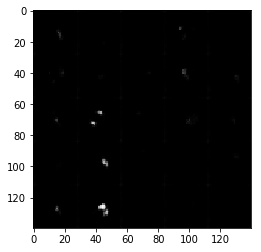

Epoch 1/2... Discriminator Loss: 1.482... Generator Loss: 0.571
Epoch 1/2... Discriminator Loss: 1.470... Generator Loss: 0.612
Epoch 1/2... Discriminator Loss: 1.366... Generator Loss: 0.918
Epoch 1/2... Discriminator Loss: 1.520... Generator Loss: 1.327
Epoch 1/2... Discriminator Loss: 1.600... Generator Loss: 1.533
Epoch 1/2... Discriminator Loss: 1.592... Generator Loss: 0.837
Epoch 1/2... Discriminator Loss: 1.574... Generator Loss: 1.272
Epoch 1/2... Discriminator Loss: 1.416... Generator Loss: 1.177
Epoch 1/2... Discriminator Loss: 1.356... Generator Loss: 0.773
Epoch 1/2... Discriminator Loss: 1.508... Generator Loss: 1.280


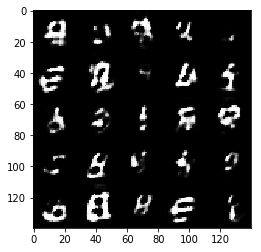

Epoch 1/2... Discriminator Loss: 1.379... Generator Loss: 1.226
Epoch 1/2... Discriminator Loss: 1.409... Generator Loss: 0.741
Epoch 1/2... Discriminator Loss: 1.514... Generator Loss: 0.464
Epoch 1/2... Discriminator Loss: 1.417... Generator Loss: 0.688
Epoch 1/2... Discriminator Loss: 1.364... Generator Loss: 0.678
Epoch 1/2... Discriminator Loss: 1.452... Generator Loss: 0.568
Epoch 1/2... Discriminator Loss: 1.407... Generator Loss: 0.663
Epoch 1/2... Discriminator Loss: 1.540... Generator Loss: 0.484
Epoch 1/2... Discriminator Loss: 1.411... Generator Loss: 0.834
Epoch 1/2... Discriminator Loss: 1.495... Generator Loss: 0.539


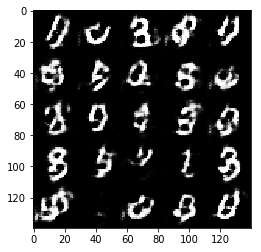

Epoch 1/2... Discriminator Loss: 1.343... Generator Loss: 0.823
Epoch 1/2... Discriminator Loss: 1.328... Generator Loss: 0.974
Epoch 1/2... Discriminator Loss: 1.607... Generator Loss: 1.475
Epoch 1/2... Discriminator Loss: 1.482... Generator Loss: 1.193
Epoch 1/2... Discriminator Loss: 1.432... Generator Loss: 0.703
Epoch 1/2... Discriminator Loss: 1.375... Generator Loss: 0.755
Epoch 1/2... Discriminator Loss: 1.538... Generator Loss: 0.452
Epoch 1/2... Discriminator Loss: 1.356... Generator Loss: 0.836
Epoch 1/2... Discriminator Loss: 1.480... Generator Loss: 1.215
Epoch 1/2... Discriminator Loss: 1.385... Generator Loss: 1.038


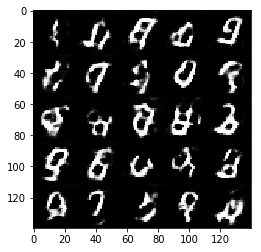

Epoch 1/2... Discriminator Loss: 1.414... Generator Loss: 1.061
Epoch 1/2... Discriminator Loss: 1.439... Generator Loss: 1.113
Epoch 1/2... Discriminator Loss: 1.434... Generator Loss: 1.200
Epoch 1/2... Discriminator Loss: 1.361... Generator Loss: 0.988
Epoch 1/2... Discriminator Loss: 1.479... Generator Loss: 1.200
Epoch 1/2... Discriminator Loss: 1.342... Generator Loss: 0.856
Epoch 1/2... Discriminator Loss: 1.399... Generator Loss: 0.642
Epoch 1/2... Discriminator Loss: 1.395... Generator Loss: 0.645
Epoch 1/2... Discriminator Loss: 1.380... Generator Loss: 0.631
Epoch 1/2... Discriminator Loss: 1.358... Generator Loss: 0.689


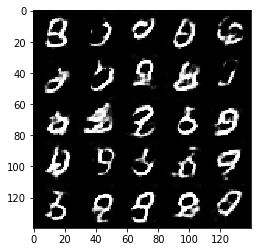

Epoch 1/2... Discriminator Loss: 1.415... Generator Loss: 1.082
Epoch 1/2... Discriminator Loss: 1.354... Generator Loss: 0.825
Epoch 1/2... Discriminator Loss: 1.538... Generator Loss: 0.474
Epoch 1/2... Discriminator Loss: 1.432... Generator Loss: 0.631
Epoch 1/2... Discriminator Loss: 1.438... Generator Loss: 0.581
Epoch 1/2... Discriminator Loss: 1.388... Generator Loss: 0.671
Epoch 1/2... Discriminator Loss: 1.360... Generator Loss: 0.957
Epoch 1/2... Discriminator Loss: 1.433... Generator Loss: 1.194
Epoch 1/2... Discriminator Loss: 1.403... Generator Loss: 0.985
Epoch 1/2... Discriminator Loss: 1.419... Generator Loss: 1.124


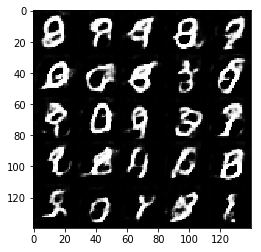

Epoch 1/2... Discriminator Loss: 1.406... Generator Loss: 1.058
Epoch 1/2... Discriminator Loss: 1.446... Generator Loss: 1.033
Epoch 1/2... Discriminator Loss: 1.390... Generator Loss: 0.994
Epoch 1/2... Discriminator Loss: 1.380... Generator Loss: 1.007
Epoch 1/2... Discriminator Loss: 1.492... Generator Loss: 1.227
Epoch 1/2... Discriminator Loss: 1.362... Generator Loss: 0.890
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.998
Epoch 1/2... Discriminator Loss: 1.409... Generator Loss: 0.765
Epoch 1/2... Discriminator Loss: 1.415... Generator Loss: 0.623
Epoch 1/2... Discriminator Loss: 1.449... Generator Loss: 0.534


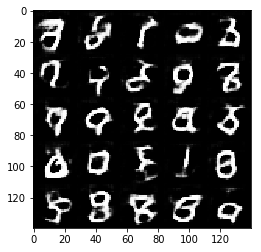

Epoch 1/2... Discriminator Loss: 1.430... Generator Loss: 0.673
Epoch 1/2... Discriminator Loss: 1.481... Generator Loss: 0.534
Epoch 1/2... Discriminator Loss: 1.384... Generator Loss: 0.775
Epoch 1/2... Discriminator Loss: 1.505... Generator Loss: 0.497
Epoch 1/2... Discriminator Loss: 1.367... Generator Loss: 0.755
Epoch 1/2... Discriminator Loss: 1.361... Generator Loss: 0.906
Epoch 1/2... Discriminator Loss: 1.440... Generator Loss: 1.171
Epoch 1/2... Discriminator Loss: 1.450... Generator Loss: 1.150
Epoch 1/2... Discriminator Loss: 1.352... Generator Loss: 0.868
Epoch 1/2... Discriminator Loss: 1.385... Generator Loss: 1.075


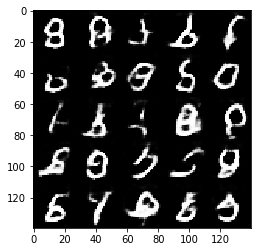

Epoch 1/2... Discriminator Loss: 1.377... Generator Loss: 1.066
Epoch 1/2... Discriminator Loss: 1.415... Generator Loss: 1.077
Epoch 1/2... Discriminator Loss: 1.361... Generator Loss: 0.767
Epoch 1/2... Discriminator Loss: 1.379... Generator Loss: 0.870
Epoch 1/2... Discriminator Loss: 1.461... Generator Loss: 1.147
Epoch 1/2... Discriminator Loss: 1.402... Generator Loss: 0.874
Epoch 1/2... Discriminator Loss: 1.375... Generator Loss: 0.618
Epoch 1/2... Discriminator Loss: 1.375... Generator Loss: 0.854
Epoch 1/2... Discriminator Loss: 1.524... Generator Loss: 1.329
Epoch 1/2... Discriminator Loss: 1.365... Generator Loss: 0.826


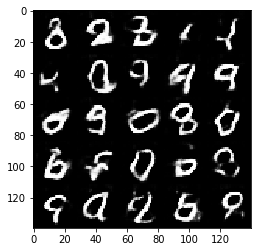

Epoch 1/2... Discriminator Loss: 1.422... Generator Loss: 0.634
Epoch 1/2... Discriminator Loss: 1.396... Generator Loss: 0.629
Epoch 1/2... Discriminator Loss: 1.354... Generator Loss: 0.741
Epoch 2/2... Discriminator Loss: 1.422... Generator Loss: 1.198
Epoch 2/2... Discriminator Loss: 1.380... Generator Loss: 1.077
Epoch 2/2... Discriminator Loss: 1.361... Generator Loss: 0.753
Epoch 2/2... Discriminator Loss: 1.450... Generator Loss: 1.165
Epoch 2/2... Discriminator Loss: 1.423... Generator Loss: 1.130
Epoch 2/2... Discriminator Loss: 1.382... Generator Loss: 1.105
Epoch 2/2... Discriminator Loss: 1.431... Generator Loss: 0.667


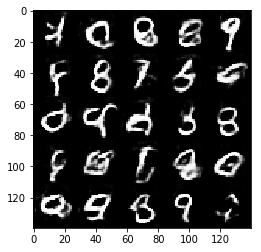

Epoch 2/2... Discriminator Loss: 1.423... Generator Loss: 0.571
Epoch 2/2... Discriminator Loss: 1.364... Generator Loss: 0.756
Epoch 2/2... Discriminator Loss: 1.370... Generator Loss: 0.701
Epoch 2/2... Discriminator Loss: 1.368... Generator Loss: 0.714
Epoch 2/2... Discriminator Loss: 1.342... Generator Loss: 0.806
Epoch 2/2... Discriminator Loss: 1.379... Generator Loss: 0.676
Epoch 2/2... Discriminator Loss: 1.398... Generator Loss: 0.619
Epoch 2/2... Discriminator Loss: 1.390... Generator Loss: 0.823
Epoch 2/2... Discriminator Loss: 1.378... Generator Loss: 0.818
Epoch 2/2... Discriminator Loss: 1.404... Generator Loss: 0.581


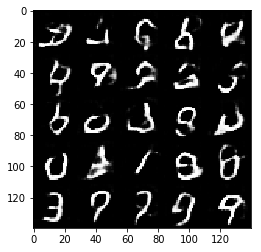

Epoch 2/2... Discriminator Loss: 1.376... Generator Loss: 0.700
Epoch 2/2... Discriminator Loss: 1.388... Generator Loss: 0.970
Epoch 2/2... Discriminator Loss: 1.399... Generator Loss: 1.058
Epoch 2/2... Discriminator Loss: 1.369... Generator Loss: 0.748
Epoch 2/2... Discriminator Loss: 1.380... Generator Loss: 0.627
Epoch 2/2... Discriminator Loss: 1.362... Generator Loss: 0.685
Epoch 2/2... Discriminator Loss: 1.393... Generator Loss: 1.013
Epoch 2/2... Discriminator Loss: 1.365... Generator Loss: 0.878
Epoch 2/2... Discriminator Loss: 1.376... Generator Loss: 1.037
Epoch 2/2... Discriminator Loss: 1.461... Generator Loss: 1.026


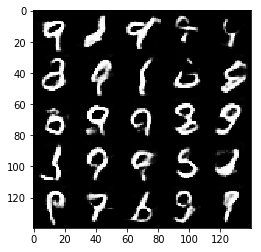

Epoch 2/2... Discriminator Loss: 1.502... Generator Loss: 0.467
Epoch 2/2... Discriminator Loss: 1.369... Generator Loss: 0.907
Epoch 2/2... Discriminator Loss: 1.376... Generator Loss: 0.660
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.727
Epoch 2/2... Discriminator Loss: 1.419... Generator Loss: 0.676
Epoch 2/2... Discriminator Loss: 1.345... Generator Loss: 0.819
Epoch 2/2... Discriminator Loss: 1.532... Generator Loss: 1.373
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.763
Epoch 2/2... Discriminator Loss: 1.409... Generator Loss: 0.673
Epoch 2/2... Discriminator Loss: 1.454... Generator Loss: 0.557


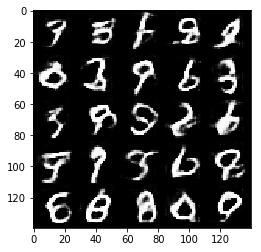

Epoch 2/2... Discriminator Loss: 1.388... Generator Loss: 0.708
Epoch 2/2... Discriminator Loss: 1.418... Generator Loss: 0.565
Epoch 2/2... Discriminator Loss: 1.359... Generator Loss: 0.877
Epoch 2/2... Discriminator Loss: 1.424... Generator Loss: 0.986
Epoch 2/2... Discriminator Loss: 1.350... Generator Loss: 0.730
Epoch 2/2... Discriminator Loss: 1.411... Generator Loss: 0.611
Epoch 2/2... Discriminator Loss: 1.384... Generator Loss: 0.793
Epoch 2/2... Discriminator Loss: 1.360... Generator Loss: 0.879
Epoch 2/2... Discriminator Loss: 1.498... Generator Loss: 1.332
Epoch 2/2... Discriminator Loss: 1.367... Generator Loss: 0.804


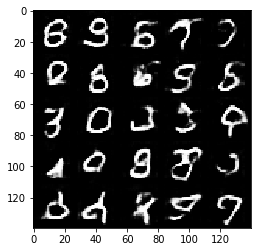

Epoch 2/2... Discriminator Loss: 1.453... Generator Loss: 0.535
Epoch 2/2... Discriminator Loss: 1.372... Generator Loss: 0.755
Epoch 2/2... Discriminator Loss: 1.370... Generator Loss: 0.689
Epoch 2/2... Discriminator Loss: 1.456... Generator Loss: 0.526
Epoch 2/2... Discriminator Loss: 1.373... Generator Loss: 0.777
Epoch 2/2... Discriminator Loss: 1.395... Generator Loss: 0.655
Epoch 2/2... Discriminator Loss: 1.382... Generator Loss: 0.901
Epoch 2/2... Discriminator Loss: 1.397... Generator Loss: 1.075
Epoch 2/2... Discriminator Loss: 1.352... Generator Loss: 0.833
Epoch 2/2... Discriminator Loss: 1.352... Generator Loss: 0.891


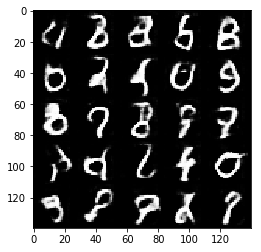

Epoch 2/2... Discriminator Loss: 1.357... Generator Loss: 0.968
Epoch 2/2... Discriminator Loss: 1.411... Generator Loss: 1.107
Epoch 2/2... Discriminator Loss: 1.514... Generator Loss: 1.290
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.919
Epoch 2/2... Discriminator Loss: 1.363... Generator Loss: 0.847
Epoch 2/2... Discriminator Loss: 1.428... Generator Loss: 0.574
Epoch 2/2... Discriminator Loss: 1.390... Generator Loss: 0.649
Epoch 2/2... Discriminator Loss: 1.383... Generator Loss: 0.771
Epoch 2/2... Discriminator Loss: 1.376... Generator Loss: 0.786
Epoch 2/2... Discriminator Loss: 1.377... Generator Loss: 0.910


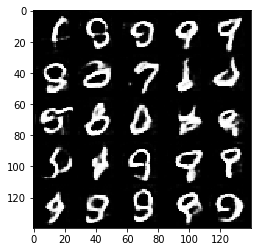

Epoch 2/2... Discriminator Loss: 1.376... Generator Loss: 1.077
Epoch 2/2... Discriminator Loss: 1.368... Generator Loss: 0.917
Epoch 2/2... Discriminator Loss: 1.393... Generator Loss: 0.721
Epoch 2/2... Discriminator Loss: 1.450... Generator Loss: 0.550
Epoch 2/2... Discriminator Loss: 1.379... Generator Loss: 1.043
Epoch 2/2... Discriminator Loss: 1.400... Generator Loss: 0.666
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.821
Epoch 2/2... Discriminator Loss: 1.390... Generator Loss: 0.689
Epoch 2/2... Discriminator Loss: 1.423... Generator Loss: 0.581
Epoch 2/2... Discriminator Loss: 1.373... Generator Loss: 0.690


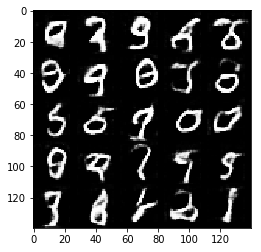

Epoch 2/2... Discriminator Loss: 1.376... Generator Loss: 0.738
Epoch 2/2... Discriminator Loss: 1.378... Generator Loss: 0.896
Epoch 2/2... Discriminator Loss: 1.367... Generator Loss: 0.804
Epoch 2/2... Discriminator Loss: 1.361... Generator Loss: 0.738
Epoch 2/2... Discriminator Loss: 1.350... Generator Loss: 0.946
Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.881
Epoch 2/2... Discriminator Loss: 1.359... Generator Loss: 1.021
Epoch 2/2... Discriminator Loss: 1.411... Generator Loss: 1.115
Epoch 2/2... Discriminator Loss: 1.341... Generator Loss: 0.974
Epoch 2/2... Discriminator Loss: 1.368... Generator Loss: 0.965


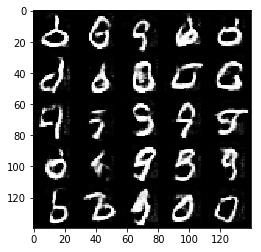

Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.739
Epoch 2/2... Discriminator Loss: 1.415... Generator Loss: 0.657
Epoch 2/2... Discriminator Loss: 1.369... Generator Loss: 0.864
Epoch 2/2... Discriminator Loss: 1.346... Generator Loss: 0.895
Epoch 2/2... Discriminator Loss: 1.390... Generator Loss: 1.098
Epoch 2/2... Discriminator Loss: 1.383... Generator Loss: 1.031
Epoch 2/2... Discriminator Loss: 1.406... Generator Loss: 1.070


In [37]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.962... Generator Loss: 0.533
Epoch 1/1... Discriminator Loss: 1.561... Generator Loss: 1.136
Epoch 1/1... Discriminator Loss: 1.275... Generator Loss: 1.332
Epoch 1/1... Discriminator Loss: 2.184... Generator Loss: 1.211
Epoch 1/1... Discriminator Loss: 1.145... Generator Loss: 0.961
Epoch 1/1... Discriminator Loss: 1.246... Generator Loss: 1.339
Epoch 1/1... Discriminator Loss: 1.058... Generator Loss: 1.177
Epoch 1/1... Discriminator Loss: 1.135... Generator Loss: 1.156
Epoch 1/1... Discriminator Loss: 1.044... Generator Loss: 1.723
Epoch 1/1... Discriminator Loss: 1.543... Generator Loss: 0.931


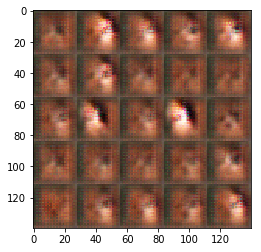

Epoch 1/1... Discriminator Loss: 1.642... Generator Loss: 1.084
Epoch 1/1... Discriminator Loss: 1.389... Generator Loss: 1.468
Epoch 1/1... Discriminator Loss: 1.092... Generator Loss: 1.348
Epoch 1/1... Discriminator Loss: 1.346... Generator Loss: 0.952
Epoch 1/1... Discriminator Loss: 1.682... Generator Loss: 0.677
Epoch 1/1... Discriminator Loss: 1.448... Generator Loss: 0.820
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.715... Generator Loss: 1.738
Epoch 1/1... Discriminator Loss: 1.181... Generator Loss: 1.005
Epoch 1/1... Discriminator Loss: 1.557... Generator Loss: 0.805


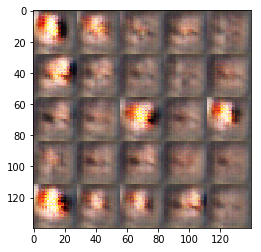

Epoch 1/1... Discriminator Loss: 1.485... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.466... Generator Loss: 1.165
Epoch 1/1... Discriminator Loss: 1.557... Generator Loss: 0.704
Epoch 1/1... Discriminator Loss: 1.251... Generator Loss: 1.480
Epoch 1/1... Discriminator Loss: 1.520... Generator Loss: 1.228
Epoch 1/1... Discriminator Loss: 1.595... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.919... Generator Loss: 0.689
Epoch 1/1... Discriminator Loss: 1.690... Generator Loss: 1.157
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 1.213
Epoch 1/1... Discriminator Loss: 1.303... Generator Loss: 0.929


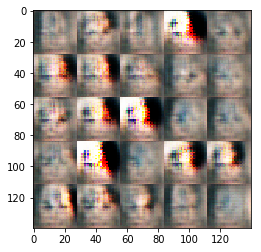

Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.685
Epoch 1/1... Discriminator Loss: 1.335... Generator Loss: 1.036
Epoch 1/1... Discriminator Loss: 1.561... Generator Loss: 1.561
Epoch 1/1... Discriminator Loss: 1.782... Generator Loss: 0.800
Epoch 1/1... Discriminator Loss: 1.497... Generator Loss: 0.678
Epoch 1/1... Discriminator Loss: 1.541... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.651... Generator Loss: 1.813
Epoch 1/1... Discriminator Loss: 1.382... Generator Loss: 0.958
Epoch 1/1... Discriminator Loss: 1.705... Generator Loss: 0.875
Epoch 1/1... Discriminator Loss: 1.783... Generator Loss: 1.221


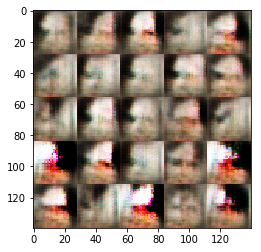

Epoch 1/1... Discriminator Loss: 1.240... Generator Loss: 0.784
Epoch 1/1... Discriminator Loss: 1.582... Generator Loss: 0.745
Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.809
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.957
Epoch 1/1... Discriminator Loss: 1.403... Generator Loss: 1.124
Epoch 1/1... Discriminator Loss: 1.629... Generator Loss: 0.878
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.844
Epoch 1/1... Discriminator Loss: 1.612... Generator Loss: 0.729
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.726
Epoch 1/1... Discriminator Loss: 1.592... Generator Loss: 0.504


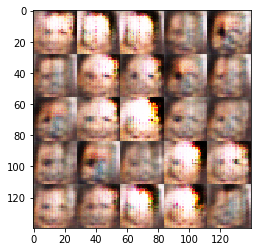

Epoch 1/1... Discriminator Loss: 1.551... Generator Loss: 0.646
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.950
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.939
Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.946
Epoch 1/1... Discriminator Loss: 1.473... Generator Loss: 0.632
Epoch 1/1... Discriminator Loss: 1.583... Generator Loss: 0.694
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.903
Epoch 1/1... Discriminator Loss: 1.526... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.539... Generator Loss: 0.642
Epoch 1/1... Discriminator Loss: 1.569... Generator Loss: 0.846


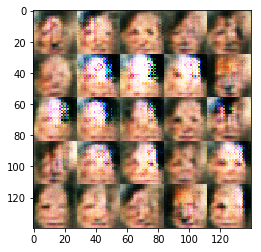

Epoch 1/1... Discriminator Loss: 1.548... Generator Loss: 1.048
Epoch 1/1... Discriminator Loss: 1.419... Generator Loss: 0.613
Epoch 1/1... Discriminator Loss: 1.539... Generator Loss: 0.942
Epoch 1/1... Discriminator Loss: 1.574... Generator Loss: 1.499
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.573... Generator Loss: 0.718
Epoch 1/1... Discriminator Loss: 1.527... Generator Loss: 1.056
Epoch 1/1... Discriminator Loss: 1.671... Generator Loss: 0.993
Epoch 1/1... Discriminator Loss: 1.528... Generator Loss: 0.863
Epoch 1/1... Discriminator Loss: 1.487... Generator Loss: 0.728


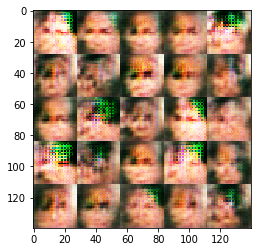

Epoch 1/1... Discriminator Loss: 1.460... Generator Loss: 0.956
Epoch 1/1... Discriminator Loss: 1.402... Generator Loss: 0.852
Epoch 1/1... Discriminator Loss: 1.475... Generator Loss: 0.865
Epoch 1/1... Discriminator Loss: 1.499... Generator Loss: 0.864
Epoch 1/1... Discriminator Loss: 1.529... Generator Loss: 1.035
Epoch 1/1... Discriminator Loss: 1.578... Generator Loss: 0.974
Epoch 1/1... Discriminator Loss: 1.358... Generator Loss: 0.710
Epoch 1/1... Discriminator Loss: 1.564... Generator Loss: 1.110
Epoch 1/1... Discriminator Loss: 1.447... Generator Loss: 0.668
Epoch 1/1... Discriminator Loss: 1.466... Generator Loss: 0.791


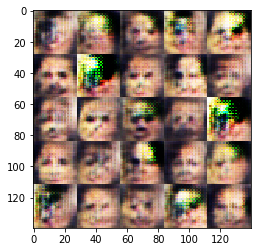

Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.738
Epoch 1/1... Discriminator Loss: 1.491... Generator Loss: 1.073
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.876
Epoch 1/1... Discriminator Loss: 1.506... Generator Loss: 0.598
Epoch 1/1... Discriminator Loss: 1.550... Generator Loss: 1.060
Epoch 1/1... Discriminator Loss: 1.417... Generator Loss: 0.891
Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.945
Epoch 1/1... Discriminator Loss: 1.354... Generator Loss: 1.002
Epoch 1/1... Discriminator Loss: 1.488... Generator Loss: 1.199
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 1.027


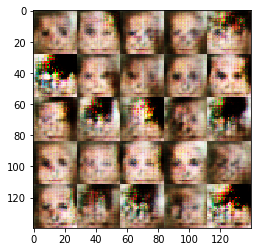

Epoch 1/1... Discriminator Loss: 1.475... Generator Loss: 0.697
Epoch 1/1... Discriminator Loss: 1.456... Generator Loss: 0.712
Epoch 1/1... Discriminator Loss: 1.395... Generator Loss: 1.017
Epoch 1/1... Discriminator Loss: 1.509... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.373... Generator Loss: 0.951
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.973
Epoch 1/1... Discriminator Loss: 1.684... Generator Loss: 1.091
Epoch 1/1... Discriminator Loss: 1.337... Generator Loss: 0.829
Epoch 1/1... Discriminator Loss: 1.491... Generator Loss: 0.922
Epoch 1/1... Discriminator Loss: 1.331... Generator Loss: 0.940


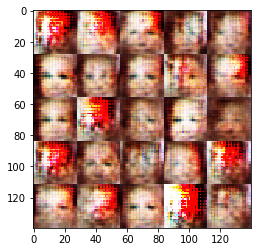

Epoch 1/1... Discriminator Loss: 1.404... Generator Loss: 0.931
Epoch 1/1... Discriminator Loss: 1.498... Generator Loss: 0.625
Epoch 1/1... Discriminator Loss: 1.518... Generator Loss: 0.894
Epoch 1/1... Discriminator Loss: 1.497... Generator Loss: 0.828
Epoch 1/1... Discriminator Loss: 1.539... Generator Loss: 0.758
Epoch 1/1... Discriminator Loss: 1.407... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.645... Generator Loss: 0.563
Epoch 1/1... Discriminator Loss: 1.589... Generator Loss: 1.013
Epoch 1/1... Discriminator Loss: 1.610... Generator Loss: 1.042
Epoch 1/1... Discriminator Loss: 1.464... Generator Loss: 0.747


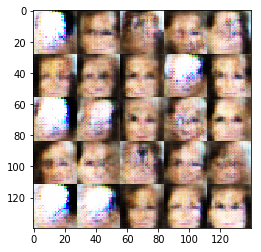

Epoch 1/1... Discriminator Loss: 1.491... Generator Loss: 0.619
Epoch 1/1... Discriminator Loss: 1.542... Generator Loss: 0.933
Epoch 1/1... Discriminator Loss: 1.475... Generator Loss: 0.819
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.752
Epoch 1/1... Discriminator Loss: 1.436... Generator Loss: 1.016
Epoch 1/1... Discriminator Loss: 1.470... Generator Loss: 0.745
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.760
Epoch 1/1... Discriminator Loss: 1.430... Generator Loss: 0.871
Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.742
Epoch 1/1... Discriminator Loss: 1.730... Generator Loss: 1.010


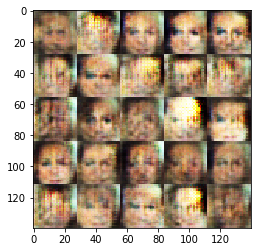

Epoch 1/1... Discriminator Loss: 1.561... Generator Loss: 0.749
Epoch 1/1... Discriminator Loss: 1.526... Generator Loss: 0.886
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.674
Epoch 1/1... Discriminator Loss: 1.524... Generator Loss: 0.845
Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.925
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.470... Generator Loss: 0.870
Epoch 1/1... Discriminator Loss: 1.446... Generator Loss: 0.947
Epoch 1/1... Discriminator Loss: 1.418... Generator Loss: 0.837
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.759


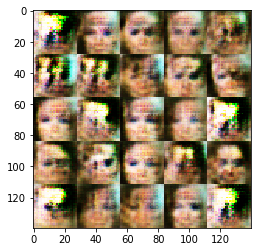

Epoch 1/1... Discriminator Loss: 1.557... Generator Loss: 0.899
Epoch 1/1... Discriminator Loss: 1.566... Generator Loss: 0.879
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.971
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.646... Generator Loss: 0.863
Epoch 1/1... Discriminator Loss: 1.383... Generator Loss: 0.756
Epoch 1/1... Discriminator Loss: 1.531... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.480... Generator Loss: 0.799
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.473... Generator Loss: 0.907


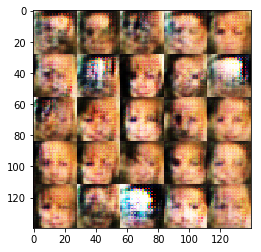

Epoch 1/1... Discriminator Loss: 1.559... Generator Loss: 0.989
Epoch 1/1... Discriminator Loss: 1.705... Generator Loss: 0.826
Epoch 1/1... Discriminator Loss: 1.353... Generator Loss: 0.756
Epoch 1/1... Discriminator Loss: 1.515... Generator Loss: 0.920
Epoch 1/1... Discriminator Loss: 1.376... Generator Loss: 0.908
Epoch 1/1... Discriminator Loss: 1.497... Generator Loss: 0.791
Epoch 1/1... Discriminator Loss: 1.487... Generator Loss: 0.756
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.475... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.881


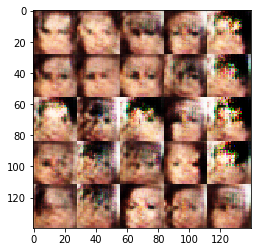

Epoch 1/1... Discriminator Loss: 1.478... Generator Loss: 0.943
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.718
Epoch 1/1... Discriminator Loss: 1.489... Generator Loss: 0.684
Epoch 1/1... Discriminator Loss: 1.464... Generator Loss: 0.911
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.933
Epoch 1/1... Discriminator Loss: 1.461... Generator Loss: 0.874
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.859
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.824
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.797
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.943


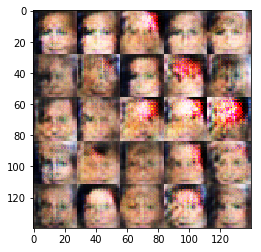

Epoch 1/1... Discriminator Loss: 1.488... Generator Loss: 0.902
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.823
Epoch 1/1... Discriminator Loss: 1.536... Generator Loss: 0.954
Epoch 1/1... Discriminator Loss: 1.638... Generator Loss: 0.789
Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.836
Epoch 1/1... Discriminator Loss: 1.476... Generator Loss: 0.734
Epoch 1/1... Discriminator Loss: 1.481... Generator Loss: 0.869
Epoch 1/1... Discriminator Loss: 1.495... Generator Loss: 0.658
Epoch 1/1... Discriminator Loss: 1.459... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.532... Generator Loss: 0.942


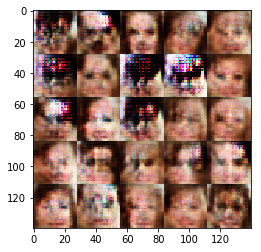

Epoch 1/1... Discriminator Loss: 1.567... Generator Loss: 0.733
Epoch 1/1... Discriminator Loss: 1.465... Generator Loss: 0.893
Epoch 1/1... Discriminator Loss: 1.391... Generator Loss: 0.877
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.676
Epoch 1/1... Discriminator Loss: 1.461... Generator Loss: 1.026
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.791
Epoch 1/1... Discriminator Loss: 1.555... Generator Loss: 0.668
Epoch 1/1... Discriminator Loss: 1.388... Generator Loss: 0.867
Epoch 1/1... Discriminator Loss: 1.548... Generator Loss: 0.687


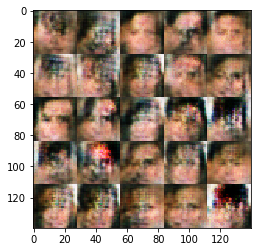

Epoch 1/1... Discriminator Loss: 1.358... Generator Loss: 0.860
Epoch 1/1... Discriminator Loss: 1.549... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.446... Generator Loss: 0.818
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 0.841
Epoch 1/1... Discriminator Loss: 1.521... Generator Loss: 0.823
Epoch 1/1... Discriminator Loss: 1.483... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.466... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.740
Epoch 1/1... Discriminator Loss: 1.421... Generator Loss: 0.861


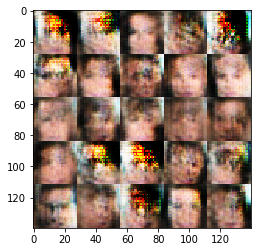

Epoch 1/1... Discriminator Loss: 1.497... Generator Loss: 0.752
Epoch 1/1... Discriminator Loss: 1.437... Generator Loss: 0.833
Epoch 1/1... Discriminator Loss: 1.535... Generator Loss: 1.002
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.870
Epoch 1/1... Discriminator Loss: 1.467... Generator Loss: 0.796
Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.865
Epoch 1/1... Discriminator Loss: 1.487... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.383... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.845


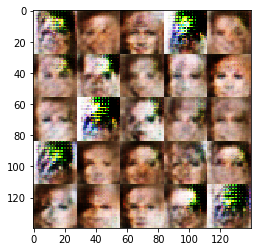

Epoch 1/1... Discriminator Loss: 1.389... Generator Loss: 0.897
Epoch 1/1... Discriminator Loss: 1.356... Generator Loss: 0.779
Epoch 1/1... Discriminator Loss: 1.562... Generator Loss: 0.719
Epoch 1/1... Discriminator Loss: 1.465... Generator Loss: 0.861
Epoch 1/1... Discriminator Loss: 1.349... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.512... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.546... Generator Loss: 0.751
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.750
Epoch 1/1... Discriminator Loss: 1.459... Generator Loss: 0.851


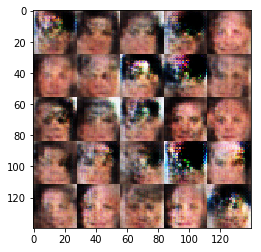

Epoch 1/1... Discriminator Loss: 1.478... Generator Loss: 0.919
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.638... Generator Loss: 0.874
Epoch 1/1... Discriminator Loss: 1.485... Generator Loss: 0.855
Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.981
Epoch 1/1... Discriminator Loss: 1.465... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.483... Generator Loss: 0.726
Epoch 1/1... Discriminator Loss: 1.451... Generator Loss: 0.838


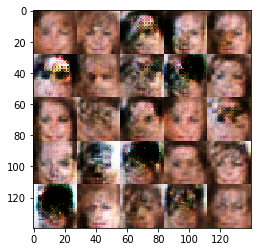

Epoch 1/1... Discriminator Loss: 1.410... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.489... Generator Loss: 0.734
Epoch 1/1... Discriminator Loss: 1.454... Generator Loss: 0.771
Epoch 1/1... Discriminator Loss: 1.586... Generator Loss: 0.819
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 0.858
Epoch 1/1... Discriminator Loss: 1.496... Generator Loss: 0.709
Epoch 1/1... Discriminator Loss: 1.501... Generator Loss: 0.826
Epoch 1/1... Discriminator Loss: 1.356... Generator Loss: 0.922
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.755
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.881


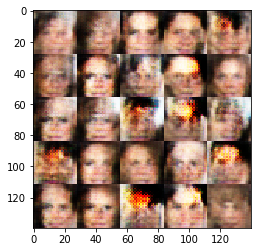

Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.884
Epoch 1/1... Discriminator Loss: 1.452... Generator Loss: 0.964
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.869
Epoch 1/1... Discriminator Loss: 1.485... Generator Loss: 0.805
Epoch 1/1... Discriminator Loss: 1.525... Generator Loss: 0.719
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.928
Epoch 1/1... Discriminator Loss: 1.451... Generator Loss: 0.821
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.433... Generator Loss: 0.806


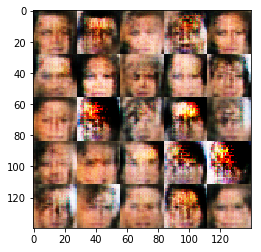

Epoch 1/1... Discriminator Loss: 1.322... Generator Loss: 0.897
Epoch 1/1... Discriminator Loss: 1.409... Generator Loss: 0.883
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.906
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.896
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.612... Generator Loss: 0.746
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.853
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.833


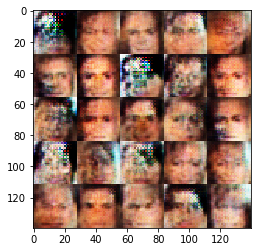

Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.881
Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.758
Epoch 1/1... Discriminator Loss: 1.423... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.430... Generator Loss: 0.822
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.812
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.868
Epoch 1/1... Discriminator Loss: 1.460... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.383... Generator Loss: 0.833


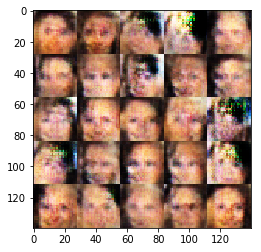

Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.745
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.797
Epoch 1/1... Discriminator Loss: 1.479... Generator Loss: 0.764
Epoch 1/1... Discriminator Loss: 1.438... Generator Loss: 0.794
Epoch 1/1... Discriminator Loss: 1.386... Generator Loss: 0.859
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.803
Epoch 1/1... Discriminator Loss: 1.454... Generator Loss: 0.765
Epoch 1/1... Discriminator Loss: 1.478... Generator Loss: 0.949
Epoch 1/1... Discriminator Loss: 1.487... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.851


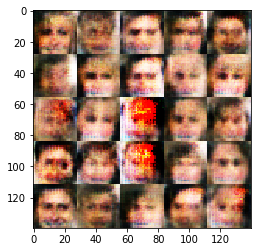

Epoch 1/1... Discriminator Loss: 1.497... Generator Loss: 0.818
Epoch 1/1... Discriminator Loss: 1.354... Generator Loss: 0.935
Epoch 1/1... Discriminator Loss: 1.528... Generator Loss: 0.797
Epoch 1/1... Discriminator Loss: 1.448... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.610... Generator Loss: 0.733
Epoch 1/1... Discriminator Loss: 1.409... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.355... Generator Loss: 0.947
Epoch 1/1... Discriminator Loss: 1.504... Generator Loss: 0.740
Epoch 1/1... Discriminator Loss: 1.419... Generator Loss: 0.764
Epoch 1/1... Discriminator Loss: 1.361... Generator Loss: 0.906


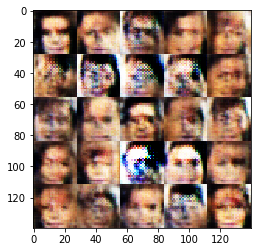

Epoch 1/1... Discriminator Loss: 1.378... Generator Loss: 0.880
Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.868
Epoch 1/1... Discriminator Loss: 1.532... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.371... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.403... Generator Loss: 0.838
Epoch 1/1... Discriminator Loss: 1.479... Generator Loss: 0.778
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.778
Epoch 1/1... Discriminator Loss: 1.329... Generator Loss: 0.786


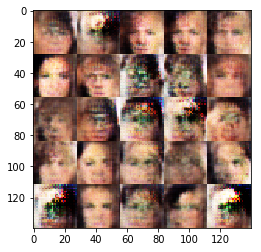

Epoch 1/1... Discriminator Loss: 1.452... Generator Loss: 0.835
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.883
Epoch 1/1... Discriminator Loss: 1.449... Generator Loss: 0.800
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.354... Generator Loss: 0.983
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.454... Generator Loss: 0.808
Epoch 1/1... Discriminator Loss: 1.495... Generator Loss: 0.961
Epoch 1/1... Discriminator Loss: 1.508... Generator Loss: 1.009
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.799


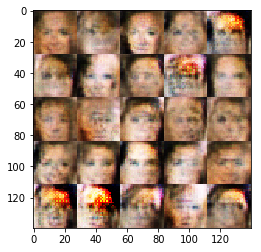

Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.842
Epoch 1/1... Discriminator Loss: 1.350... Generator Loss: 0.841
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.716
Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.367... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.504... Generator Loss: 0.916
Epoch 1/1... Discriminator Loss: 1.481... Generator Loss: 0.897
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.788
Epoch 1/1... Discriminator Loss: 1.417... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.650... Generator Loss: 0.850


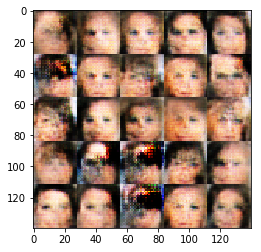

Epoch 1/1... Discriminator Loss: 1.423... Generator Loss: 0.854
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.842
Epoch 1/1... Discriminator Loss: 1.368... Generator Loss: 0.779
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.843


In [ ]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.